# Jersey city crime Analysis - Jersey City: Part-1

### Exploratory analysis on Jersey city crime and ways to crube them is the object of this project
### The data used for the analysis are real time data (for academic purpose)

In [1]:
import numpy as np
import pandas as pd
import scipy as spy
import seaborn as sns
%matplotlib inline

# Load Data into Python environment

In [2]:
crime_data=pd.read_csv("E:\\Sem 1\\Data Mining\\project\\jersey_city.CSV")
crime_data.head()

,OBJECTID,Identifier,Occurrence Date,Day of Week,Occurrence Month,Occurrence Day,Occurrence Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
0,1.0,f070032d,09/06/1940 07:30:00 PM,Friday,Sep,6.0,1940.0,19.0,9.0,7.0,2010.0,BURGLARY,FELONY,D,66.0,BROOKLYN,N.Y. POLICE DEPT,987478.0,166141.0,"(40.6227027620001, -73.9883732929999)"
1,2.0,c6245d4d,12/14/1968 12:20:00 AM,Saturday,Dec,14.0,1968.0,0.0,12.0,14.0,2008.0,GRAND LARCENY,FELONY,G,28.0,MANHATTAN,N.Y. POLICE DEPT,996470.0,232106.0,"(40.8037530600001, -73.955861904)"
2,3.0,716dbc6f,10/30/1970 03:30:00 PM,Friday,Oct,30.0,1970.0,15.0,10.0,31.0,2008.0,BURGLARY,FELONY,H,84.0,BROOKLYN,N.Y. POLICE DEPT,986508.0,190249.0,"(40.688874254, -73.9918594329999)"
3,4.0,638cd7b7,07/18/1972 11:00:00 PM,Tuesday,Jul,18.0,1972.0,23.0,7.0,19.0,2012.0,GRAND LARCENY OF MOTOR VEHICLE,FELONY,F,73.0,BROOKLYN,N.Y. POLICE DEPT,1005876.0,182440.0,"(40.6674141890001, -73.9220463899999)"
4,5.0,6e410287,05/21/1987 12:01:00 AM,Thursday,May,21.0,1987.0,0.0,5.0,28.0,2009.0,GRAND LARCENY,FELONY,K,75.0,BROOKLYN,N.Y. POLICE DEPT,1017958.0,182266.0,"(40.6668988440001, -73.878495425)"


In [4]:
keys= list(crime_data.columns)
print(keys)

['OBJECTID', 'Identifier', 'Occurrence Date', 'Day of Week', 'Occurrence Month', 'Occurrence Day', 'Occurrence Year', 'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year', 'Offense', 'Offense Classification', 'Sector', 'Precinct', 'Borough', 'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1']


In [5]:
#Change column names--
column_names = {'Day of Week': 'Day_of_week','Occurrence Year':'Occurrence_Year','Offense Classification':'Offense_Classification'}
crime_data = (crime_data.rename(columns=column_names))
keys= list(crime_data.columns)
print(keys)

['OBJECTID', 'Identifier', 'Occurrence Date', 'Day_of_week', 'Occurrence Month', 'Occurrence Day', 'Occurrence_Year', 'Occurrence Hour', 'CompStat Month', 'CompStat Day', 'CompStat Year', 'Offense', 'Offense_Classification', 'Sector', 'Precinct', 'Borough', 'Jurisdiction', 'XCoordinate', 'YCoordinate', 'Location 1']


In [6]:
cd3list=crime_data.Offense_Classification.unique()
cd3list

array(['FELONY', nan], dtype=object)

## Exploratory analysis: 

# Crime Types and Distribution:

SEVERE CRIME:

 Murder and Man slaughter

 Fellony Assault: a crime, typically one involving violence, regarded as more serious than a          misdemeanor, and usually punishable by imprisonment for more than one year or by death.
 
 Rape


CRIME:

 Grand Larceny:(in many US states and formerly in Britain) theft of personal property having a value above a legally specified amount.

 Burglary: entry into a building illegally with intent to commit a crime, especially theft
 
 Robbery

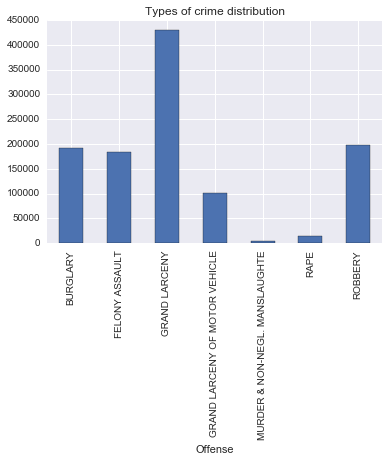

In [10]:
offence_group = crime_data.groupby('Offense')
offence_group.size()
offence_plot = offence_group.size().plot(kind='bar',title='Types of crime distribution')

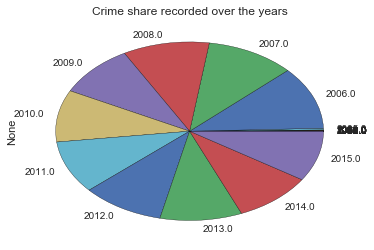

In [6]:
day_group = crime_data.groupby(['Occurrence_Year'])
day_group.size()
day_plot = day_group.size().plot(kind='pie',title='Crime share recorded over the years')

### Only data from 2006 -15 we have in  significant  no. so, Ignoring rest of data for now!

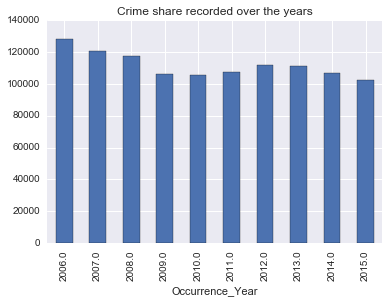

In [7]:
#seperating data after 2005 and ploting to have a visual understanding of crime rate
df = crime_data[crime_data.Occurrence_Year > 2005]
df
day_group = df.groupby(['Occurrence_Year'])
day_group.size()
day_plot = day_group.size().plot(kind='bar',title='Crime share recorded over the years')

In [8]:
day_group = df.groupby(['Occurrence_Year'])
print("Maximun Crime accounted Year %d"%day_group.size().idxmax())
print("Minimun Crime accounted Year %d"%day_group.size().idxmin())
#day_plot = day_group.size().plot(kind='bar',title='Crime share recorded over the years')

Maximun Crime accounted Year 2006
Minimun Crime accounted Year 2015


### Inference:
###### Their is significant drop in crime from year 2006 through 2015, but with this info. we can't accord significant for the analysis.

In [63]:
#seperating only 2006 data to have understanding
df06 = crime_data[crime_data.Occurrence_Year == 2006]
df06.head()

,OBJECTID,Identifier,Occurrence Date,Day_of_week,Occurrence Month,Occurrence Day,Occurrence_Year,Occurrence Hour,CompStat Month,CompStat Day,CompStat Year,Offense,Offense Classification,Sector,Precinct,Borough,Jurisdiction,XCoordinate,YCoordinate,Location 1
257,258.0,13b6949b,01/09/2006 12:00:00 AM,Monday,Jan,9.0,2006.0,0.0,8.0,16.0,2006.0,GRAND LARCENY,FELONY,H,102.0,QUEENS,N.Y. POLICE DEPT,1029007.0,194256.0,"(40.6997596520001, -73.8385879319999)"
258,259.0,c9cc0e6d,01/09/2006 12:00:00 AM,Monday,Jan,9.0,2006.0,0.0,1.0,9.0,2006.0,GRAND LARCENY,FELONY,E,1.0,MANHATTAN,N.Y. POLICE DEPT,979426.0,199624.0,"(40.7146054090001, -74.017402787)"
259,260.0,b6c31b82,01/09/2006 12:00:00 AM,Monday,Jan,9.0,2006.0,0.0,2.0,22.0,2006.0,GRAND LARCENY,FELONY,C,24.0,MANHATTAN,N.Y. POLICE DEPT,992387.0,228450.0,"(40.7937230380001, -73.9706144319999)"
260,261.0,2598f1c7,01/09/2006 12:00:00 AM,Monday,Jan,9.0,2006.0,0.0,1.0,9.0,2006.0,BURGLARY,FELONY,A,49.0,BRONX,N.Y. POLICE DEPT,1020746.0,246675.0,"(40.843673874, -73.868096037)"
261,262.0,5b4df445,01/09/2006 12:00:00 AM,Monday,Jan,9.0,2006.0,0.0,1.0,19.0,2006.0,BURGLARY,FELONY,C,49.0,BRONX,N.Y. POLICE DEPT,1028121.0,251461.0,"(40.8567764490001, -73.841409732)"


In [62]:
df_X1 = df_X.replace({ 'Sunday' : 1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7 }, regex=True)
df_X1.head()

In [10]:
#Analysis of  'Borough','Day_of_week','Offense'
day_group = df.groupby(['Borough','Day_of_week','Offense'])
print(day_group.size().idxmax())
#day_plot = day_group.size().plot(kind='bar',title='Crime share recorded over the years')

('MANHATTAN', 'Friday', 'GRAND LARCENY')


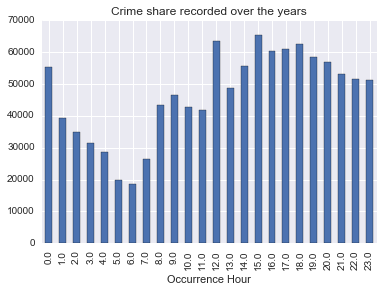

In [11]:
#histogram of based on 'Occurrence Hour'
df = crime_data[crime_data.Occurrence_Year > 2005]
df
day_group = df.groupby(['Occurrence Hour'])
day_group.size()
day_plot = day_group.size().plot(kind='bar',title='Crime share recorded over the years')

### Inference: 
###### From the histogram of Occurrence hour of crime we can say crime their is gradual dip in crime rate from 1000 to 7000, which can be considered as resting time, but the graph isn't of much significance so, lets try heat map for our analysis. 

# Recognizing Pattern of Crime:
### Grand Larceny

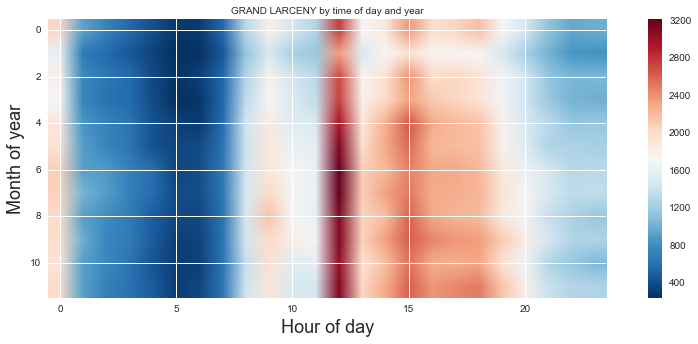

In [48]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'GRAND LARCENY'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('GRAND LARCENY by time of day and year',fontsize=10)
plt.colorbar()

### Inference:
##### From the Heat map I can infer that Grand Larceny happens through out the year and indeed happens predominently only during 1100 to 1300 hrs. And I have mapped the exact location of such crime in Jersey City map. (This is done in Tableau, If any of the community member requires Please make a request)  

### Felony Assault

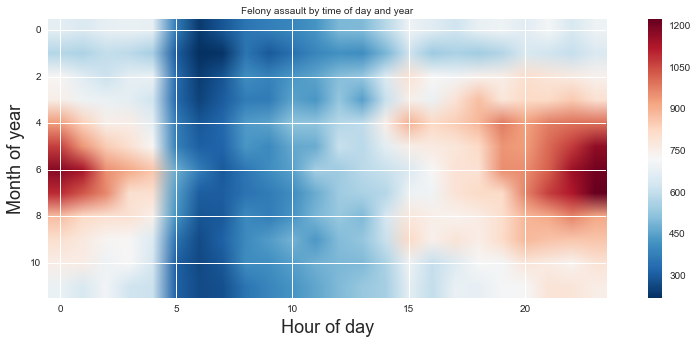

In [49]:
rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'FELONY ASSAULT'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('Felony assault by time of day and year',fontsize=10)
plt.colorbar()

### Inference:
###### From the Heat map we can Infere that Fellony assault happens from April - September, which is summer in Jersey city, and Indeed happens during 2100 to 2000 hrs, which is late in the evening to mid-night. And I have mapped the exact location of such crime in Jersey City map. (This is done in Tableau, If any of the community member requires Please make a request)   

### Burglary

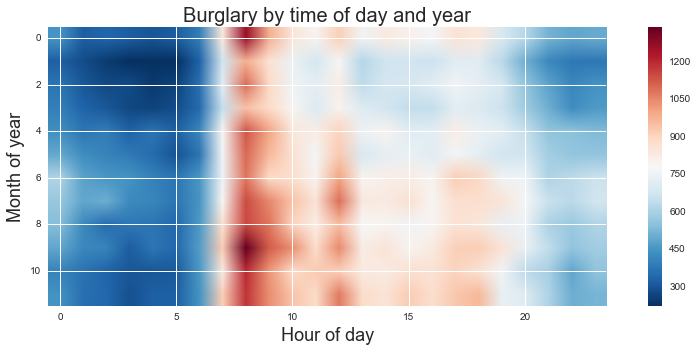

In [51]:
rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'BURGLARY'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('Burglary by time of day and year',fontsize=20)
plt.colorbar()

### Inference:
###### From the heat map we can infere that burglary happens predominantly throughout the year and happens 8000 to 1000 hrs of the day, which is morning time when people leave to work. And I have mapped the exact location of such crime in Jersey City map. (This is done in Tableau, If any of the community member requires Please make a request)  

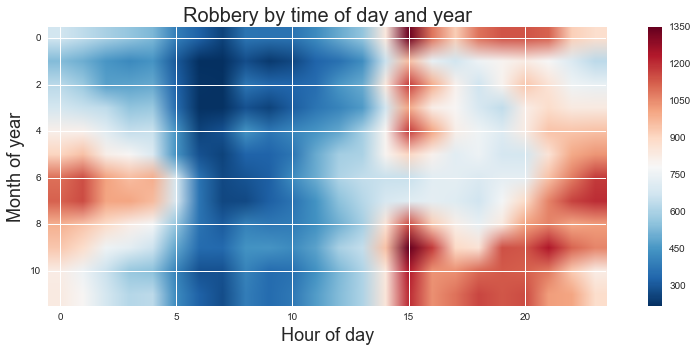

In [55]:
rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'ROBBERY'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('Robbery by time of day and year',fontsize=20)
plt.colorbar()

### Grand Larceny of Motor Vehicle

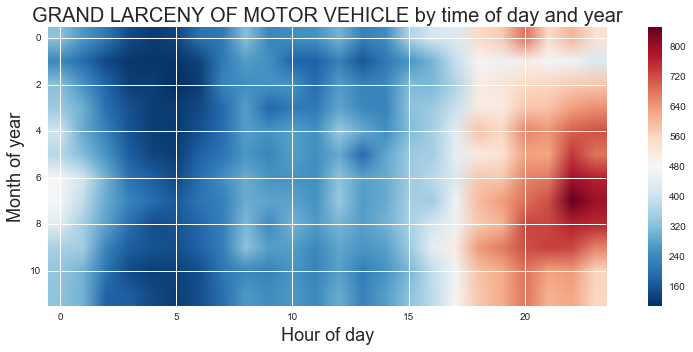

In [56]:

rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'GRAND LARCENY OF MOTOR VEHICLE'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('GRAND LARCENY OF MOTOR VEHICLE by time of day and year',fontsize=20)
plt.colorbar()

### Inference:
###### From the heat map we can Infere that grand larceny of motor vehicle happens mostly throught out the year  but happens more during months 04 through 08, which is summer and day light is for longer hours, and Indeed incident happens just past sunset in Jersey City. And I have mapped the exact location of such crime in Jersey City map. (This is done in Tableau, If any of the community member requires Please make a request)   

### Rape:

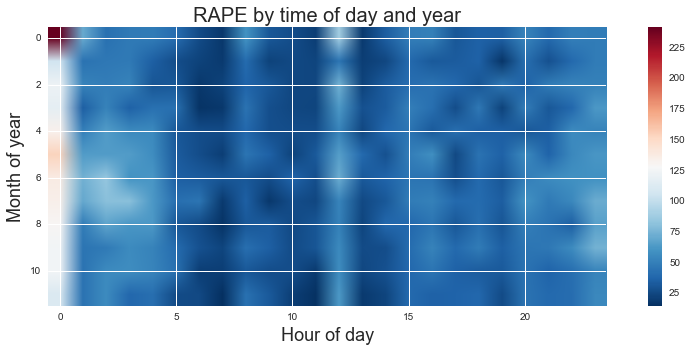

In [57]:
rcParams['figure.figsize'] = 15, 5
ct = df_X2[df_X2['Offense'] == 'RAPE'].groupby(['Occurrence Month','Occurrence Hour'])['Day_of_week'].agg(len).reset_index()
plt.imshow(np.array(pd.pivot_table(ct,values='Day_of_week',index='Occurrence Month',columns='Occurrence Hour')),cmap='RdBu_r',label='Count')
#plt.legend(loc='upper right',bbox_to_anchor=(1,.5))
plt.xlabel('Hour of day',fontsize=18)
plt.ylabel('Month of year',fontsize=18)
plt.title('RAPE by time of day and year',fontsize=20)
plt.colorbar()

### Inference:
##### This heat map is just intresting because we can see hot spot during months of  November - December, which is holiday season in Jersey city and even most of the school provides advisory to students during that time to be cautious of sexual crimes, and Time of incident is also intresting because it happens around 12 am which is also consider to be peak party time. And I have mapped the exact location of such crime in Jersey City map. (This is done in Tableau, If any of the community member requires, Please make a request)    

# Conculsion:
From the above mentioned heat map inference and exact location of high crime rate we can recommed more police patroling at specific time and provide advisory to the residents of the city to be aware of the situation. And Part-2 of analysis is done on another noteook.  